In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Чтобы графики показывались
%matplotlib inline

In [9]:
df = pd.read_csv("S02-hw-dataset.csv")

In [10]:
# Первые строчки
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [11]:
# Размер (датафрейма)
df.shape

(41, 5)

In [12]:
# Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [13]:
# Базовые статистики по числовым столбцам
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [14]:
# Проверка дубликатов
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [15]:
# Доля пропусков по столбцам
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [16]:
# Количество пропусков по столбцам
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [31]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [34]:
# возраст макс
df['age'].max()

np.float64(120.0)

In [19]:
# покупки <= 0 при положительной выручке
df[(df["purchases"] <= 0) & (df["revenue"] > 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [20]:
#41 запись, пропуски есть только в столбце age. Обнаружен один дублирующийся объект и найдены подозрительные значения: возраст 120 лет и отрицательное число покупок при ненулевой выручке.

In [21]:
df.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [22]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [35]:
df.groupby('country')['revenue'].agg(['sum', 'mean']).sort_values(['sum', 'mean'], ascending=False)

,sum,mean
country,,
RU,10271,790.076923
DE,8673,1445.500000
FR,8111,675.916667
US,4459,557.375000
CN,2108,1054.000000


In [48]:
# Россия (RU) лидирует по общей выручке, но её средняя выручка значительно ниже, чем у Германии (DE) и Китая (CN).
# Германия (DE) имеет самую высокую среднюю выручку, что говорит о высокой покупательной способности или стоимости заказов.
# Китай (CN) показывает высокую среднюю выручку при относительно низкой общей сумме, что может указывать на небольшое количество пользователей с высокой ценностью.

In [41]:
viz_df = df.dropna(subset=['age', 'revenue', 'country']).copy()

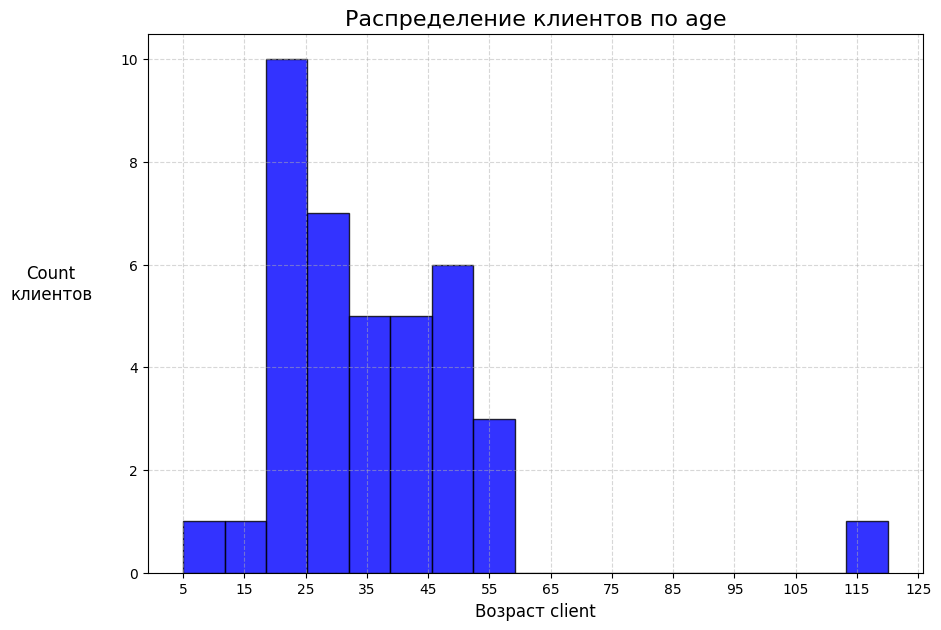

In [57]:
age_data = viz_df['age']

fig_hist, ax_hist = plt.subplots(figsize=(10, 7))

# Построение гистограммы
ax_hist.hist(
    age_data,
    bins=17,
    color='blue',
    edgecolor='black',
    alpha=0.8
)

# Подписи осей и заголовок
ax_hist.set_ylabel('Count\nклиентов', rotation=0, labelpad=50, fontsize=12)
ax_hist.set_xlabel('Возраст client', fontsize=12)
ax_hist.set_title('Распределение клиентов по age', fontsize=16)

# Деления
ax_hist.set_xticks(range(5, 130, 10))

# Сетка
ax_hist.grid(alpha=0.5, linestyle='--')

plt.savefig("figures/histogram.png", dpi=150, bbox_inches="tight")
plt.show()

In [26]:
# Распределение клиентов по возрасту. Выбрано 17 bins для того, чтобы лучше увидеть распределение данных.
# Судя по графику, можно сделать вывод, что возраст большей части клиентов находится в диапазоне от 20 до 50.

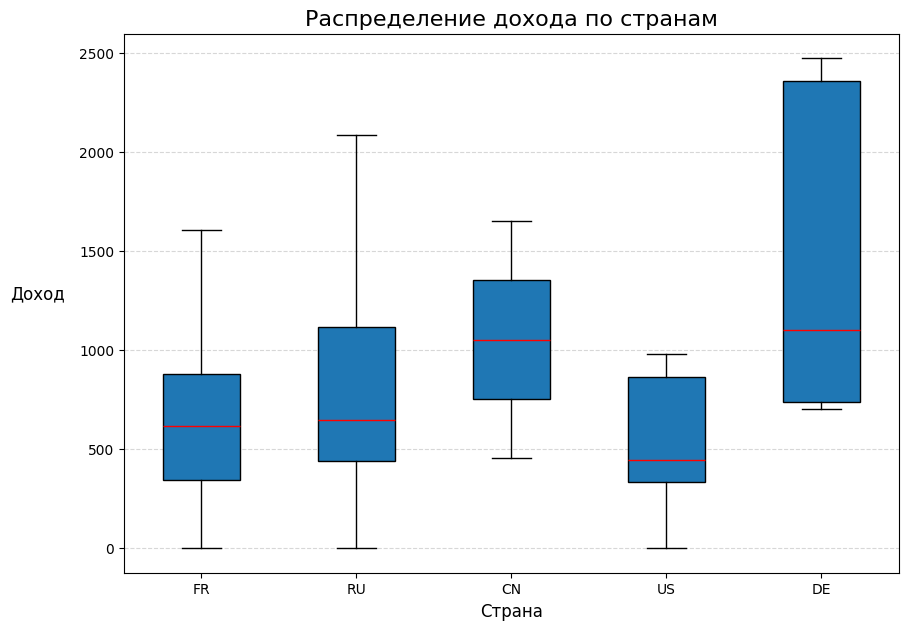

In [58]:
fig_bp, ax_bp = plt.subplots(figsize=(10, 7))

# Подготовка данных: список доходов для каждой страны
countries = viz_df['country'].unique()
data_to_plot = [viz_df[viz_df['country'] == c]['revenue'].values for c in countries]

ax_bp.boxplot(data_to_plot,
              tick_labels=countries,
              patch_artist=True, # Заливка цветом
              medianprops={'color': 'red'}) # Цвет медианы

# Подписи осей и заголовок
ax_bp.set_title('Распределение дохода по странам', fontsize=16)
ax_bp.set_ylabel('Доход', rotation=0, labelpad=30, fontsize=12)
ax_bp.set_xlabel('Страна', fontsize=12)
ax_bp.grid(axis='y', alpha=0.5, linestyle='--')

plt.savefig("figures/boxplot.png", dpi=150, bbox_inches="tight")
plt.show()

In [28]:
# Boxplot показывает распределение доходов по странам: Германия: высокие доходы, однородное распределение. Россия: большой разброс (длинные усы), есть выбросы. Китай: распределение близко к нормальному. Во всех странах значительных выбросов нет.

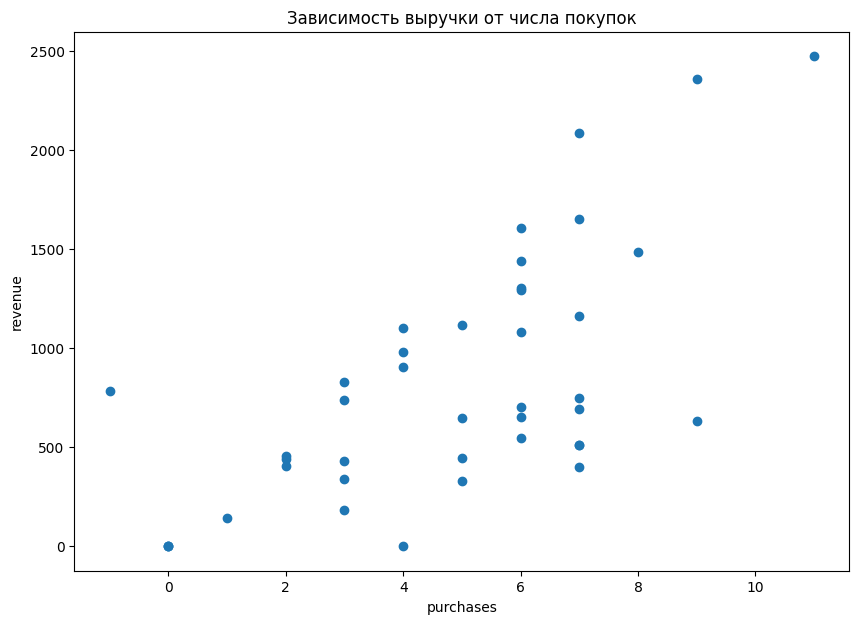

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("purchases")
plt.ylabel("revenue")
plt.title("Зависимость выручки от числа покупок")
plt.savefig("figures/scatter_plot.png", dpi=150, bbox_inches="tight")
plt.show()

In [30]:
# График показывает зависимость выручки от числа покупок: Наблюдается положительная корреляция: чем больше покупок, тем выше выручка. Есть несколько точек с аномально высокой выручкой при небольшом числе покупок — возможные выбросы. Большинство данных сосредоточено в области до 10 покупок и выручки до 500 единиц.